In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [11]:
df = pd.read_csv("epa-sea-level.csv")
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


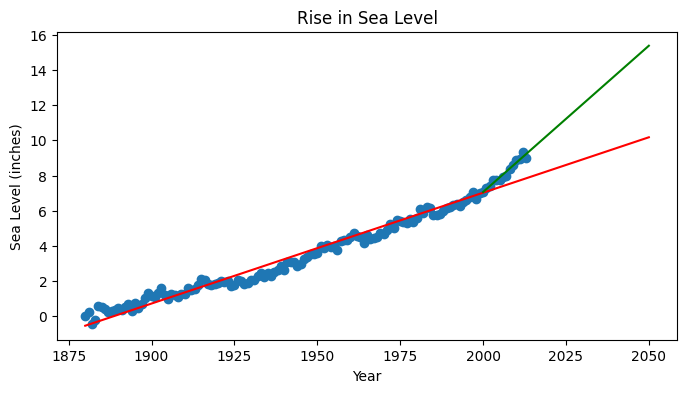

In [18]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(
    x=df["Year"],
    y=df["CSIRO Adjusted Sea Level"]
)

# Create first line of best fit
x = df["Year"]
y = df["CSIRO Adjusted Sea Level"]

res_1 = linregress(x, y)
slope_1 = res_1.slope
intercept_1 = res_1.intercept

years = np.arange(1880, 2051, 1)
sea_level = slope_1 * years + intercept_1

ax.plot(
    years,
    sea_level,
    "-",
    c="red"
)

# Create second line of best fit
df_2000 = df[df["Year"] >= 2000]
x = df_2000["Year"]
y = df_2000["CSIRO Adjusted Sea Level"]

res_2 = linregress(x, y)
slope_2 = res_2.slope
intercept_2 = res_2.intercept

years = np.arange(2000, 2051, 1)
sea_level = slope_2 * years + intercept_2

ax.plot(
    years,
    sea_level,
    "-",
    c="green"
)

# Add labels and title
ax.set(
    title = "Rise in Sea Level",
    xlabel = "Year",
    ylabel = "Sea Level (inches)"
)

plt.show()